# Resolución Trabajo Práctico 01

## Integrantes

- Gaspar Acevedo Zain

## Código para la resolución

### Imports y carga del dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_sneep_2023_csv = pd.read_csv("../dataset/sneep-2023.csv")

In [28]:
# Configuramos el output display con 100 filas
pd.options.display.max_rows = 100

### Pre-análisis del dataset: columnas IDs

In [20]:
# Mostramos las 5 primeras filas
df_sneep_2023_csv.head()

,censo_anio,provincia_sneep_id,provincia_descripcion,establecimiento_id,establecimiento_descripcion,edad,genero_id,genero_descripcion,nacionalidad_id,nacionalidad_descripcion,...,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_prision_discontinua_descripcion,participa_programa_semi_detencion_id,participa_programa_semi_detencion_descripcion,tuvo_reduccion_pena_id,tuvo_reduccion_pena_descripcion,mujer_tiene_hijos_intramuro,provincia_id,ultima_provincia_residencia_id
0,2023,23,Tucumán,163,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,57,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,90,90.0
1,2023,23,Tucumán,163,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,34,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,90,90.0
2,2023,1,Buenos Aires,162,UNIDAD 30 - GENERAL ALVEAR,42,1,Varón,1,Argentina,...,NaN,0,NaN,0,NaN,0,NaN,NaN,6,6.0
3,2023,1,Buenos Aires,162,UNIDAD 30 - GENERAL ALVEAR,36,1,Varón,1,Argentina,...,NaN,0,NaN,0,NaN,0,NaN,NaN,6,86.0
4,2023,17,San Juan,48,"SERVICIO PENITENCIARIO PROVINCIAL ""CRIO. GRAL....",25,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,70,70.0


In [29]:
df_sneep_2023_csv.shape

(111967, 86)

In [33]:
df_sneep_2023_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111967 entries, 0 to 111966
Data columns (total 86 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   censo_anio                                          111967 non-null  int64  
 1   provincia_sneep_id                                  111967 non-null  int64  
 2   provincia_descripcion                               111967 non-null  object 
 3   establecimiento_id                                  111967 non-null  int64  
 4   establecimiento_descripcion                         108955 non-null  object 
 5   edad                                                111967 non-null  int64  
 6   genero_id                                           111967 non-null  int64  
 7   genero_descripcion                                  111967 non-null  object 
 8   nacionalidad_id                                     111967 non-n

In [34]:
df_sneep_2023_csv.columns.tolist()

['censo_anio',
 'provincia_sneep_id',
 'provincia_descripcion',
 'establecimiento_id',
 'establecimiento_descripcion',
 'edad',
 'genero_id',
 'genero_descripcion',
 'nacionalidad_id',
 'nacionalidad_descripcion',
 'estado_civil_id',
 'estado_civil_descripcion',
 'nivel_instruccion_id',
 'nivel_instruccion_descripcion',
 'ultima_situacion_laboral_id',
 'ultima_situacion_laboral_descripcion',
 'capacitacion_laboral_al_ingresar_id',
 'capacitacion_laboral_al_ingresar_descripcion',
 'ultimo_lugar_residencia_id',
 'ultimo_lugar_residencia_descripcion',
 'ultima_provincia_residencia_sneep_id',
 'ultima_provincia_residencia_descripcion',
 'jurisdiccion_id',
 'jurisdiccion_descripcion',
 'situacion_legal_id',
 'situacion_legal_descripcion',
 'fecha_detencion',
 'fecha_condenado',
 'establecimiento_procedencia_id',
 'establecimiento_procedencia_descripcion',
 'delito1_id',
 'delito1_descripcion',
 'delito2_id',
 'delito2_descripcion',
 'delito3_id',
 'delito3_descripcion',
 'delito4_id',
 'del

In [35]:
df_sneep_2023_csv.nunique()

censo_anio                                               1
provincia_sneep_id                                      24
provincia_descripcion                                   24
establecimiento_id                                     336
establecimiento_descripcion                            325
edad                                                    75
genero_id                                                5
genero_descripcion                                       5
nacionalidad_id                                         16
nacionalidad_descripcion                                15
estado_civil_id                                          7
estado_civil_descripcion                                 6
nivel_instruccion_id                                    10
nivel_instruccion_descripcion                            9
ultima_situacion_laboral_id                              4
ultima_situacion_laboral_descripcion                     3
capacitacion_laboral_al_ingresar_id                     

In [7]:
# Identificamos las columnas que corresponden a IDs
columnas_id = []

for column_name in df_sneep_2023_csv.columns:
    # Agregamos aquellas que tienen sufijo "_id"
    "_id" in column_name and columnas_id.append(column_name)

In [8]:
# Validamos que todas las columnas con sufijo "_id" tengan una columna equivalente con sufijo "_descripcion"
columnas_id_sin_descripcion = []

for column_name in columnas_id:
    not (column_name.replace("_id", "_descripcion") in df_sneep_2023_csv.columns) and columnas_id_sin_descripcion.append(column_name)

In [9]:
columnas_id_provincias = []
# Obtenemos las columnas que se refieran a las provincias
for column_name in df_sneep_2023_csv.columns:
    # Agregamos aquellas que tienen sufijo "_id"
    "provincia" in column_name and columnas_id_provincias.append(column_name)

In [10]:
# Generamos una nueva lista, en donde sacamos las columnas que refieren a ID de provincias del resto que refiere a IDs
columnas_id_no_provincias = list(set(columnas_id) - set(columnas_id_provincias))

### Generamos un nuevo dataset sin columnas IDs

In [15]:
df_sneep_no_ids_csv = df_sneep_2023_csv.drop(columns=columnas_id_no_provincias)
df_sneep_no_ids_csv = df_sneep_no_ids_csv.drop(columns="censo_anio")

In [18]:
df_sneep_no_ids_csv.head(3)

,provincia_sneep_id,provincia_descripcion,establecimiento_descripcion,edad,genero_descripcion,nacionalidad_descripcion,estado_civil_descripcion,nivel_instruccion_descripcion,ultima_situacion_laboral_descripcion,capacitacion_laboral_al_ingresar_descripcion,...,reparticion_descripcion,tuvo_salidas_transitorias_descripcion,incorporado_reg_semi_libertad_descripcion,participa_programa_pre_libertad,participa_programa_prision_discontinua_descripcion,participa_programa_semi_detencion_descripcion,tuvo_reduccion_pena_descripcion,mujer_tiene_hijos_intramuro,provincia_id,ultima_provincia_residencia_id
0,23,Tucumán,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,57,Varón,Argentina,Casado/a,Terciario incompleto,Desocupado/a,No tiene ni oficio ni profesión,...,Provincial,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,0.0,No está incorporado/a,No tiene semidetención,No tuvo reducción de pena,NaN,90,90.0
1,23,Tucumán,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,34,Varón,Argentina,Soltero/a,Primario incompleto,Trabajador/ra de tiempo parcial,No tiene ni oficio ni profesión,...,Provincial,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,0.0,No está incorporado/a,No tiene semidetención,No tuvo reducción de pena,NaN,90,90.0
2,1,Buenos Aires,UNIDAD 30 - GENERAL ALVEAR,42,Varón,Argentina,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,...,Provincial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6.0


In [39]:
df_sneep_no_ids_csv.shape

(111967, 53)

In [40]:
df_sneep_no_ids_csv.nunique()

provincia_sneep_id                                      24
provincia_descripcion                                   24
establecimiento_descripcion                            325
edad                                                    75
genero_descripcion                                       5
nacionalidad_descripcion                                15
estado_civil_descripcion                                 6
nivel_instruccion_descripcion                            9
ultima_situacion_laboral_descripcion                     3
capacitacion_laboral_al_ingresar_descripcion             3
ultimo_lugar_residencia_descripcion                      2
ultima_provincia_residencia_sneep_id                    25
ultima_provincia_residencia_descripcion                 24
jurisdiccion_descripcion                                26
situacion_legal_descripcion                              4
fecha_detencion                                       6348
fecha_condenado                                       48

In [63]:
df_sneep_no_ids_csv.isna().sum()

provincia_sneep_id                                         0
provincia_descripcion                                      0
establecimiento_descripcion                             3012
edad                                                       0
genero_descripcion                                         0
nacionalidad_descripcion                                 721
estado_civil_descripcion                                2891
nivel_instruccion_descripcion                           7737
ultima_situacion_laboral_descripcion                     889
capacitacion_laboral_al_ingresar_descripcion            4205
ultimo_lugar_residencia_descripcion                       65
ultima_provincia_residencia_sneep_id                       0
ultima_provincia_residencia_descripcion                  591
jurisdiccion_descripcion                                  12
situacion_legal_descripcion                                0
fecha_detencion                                         4807
fecha_condenado         

In [60]:
df_sneep_no_ids_csv["tuvo_reduccion_pena_descripcion"].unique().tolist()

['No tuvo reducción de pena',
 nan,
 'Si - Hasta 6 meses',
 'Si - Mas de 1 año',
 'Si - Hasta 1 año']

In [64]:
df_sneep_no_ids_csv["situacion_legal_descripcion"].unique().tolist()

['Condenado/a', 'Procesado/a', 'Inimputable', 'Otra situación']

In [65]:
df_sneep_no_ids_csv_condenados = df_sneep_no_ids_csv[df_sneep_no_ids_csv["situacion_legal_descripcion"] == "Condenado/a"]

In [68]:
df_sneep_no_ids_csv_condenados.shape

(67352, 53)

In [71]:
df_sneep_no_ids_csv_no_condenados = df_sneep_no_ids_csv[df_sneep_no_ids_csv["situacion_legal_descripcion"] != "Condenado/a"]

In [76]:
df_sneep_no_ids_csv_no_condenados["genero_descripcion"].unique().tolist()

['Varón', 'Mujer', 'Trans Mujer/Travesti', 'Trans Varón']

In [89]:
df_sneep_no_ids_csv[df_sneep_no_ids_csv["fecha_detencion"].isna()]["situacion_legal_descripcion"].unique()

array(['Condenado/a', 'Procesado/a', 'Otra situación', 'Inimputable'],
      dtype=object)

In [77]:
df_sneep_no_ids_csv_no_condenados["nacionalidad_descripcion"].unique().tolist()

['Argentina',
 'Peruana',
 'Chilena',
 'Paraguaya',
 'Boliviana',
 'Otras',
 'China',
 'Uruguaya',
 'Brasileña',
 'Colombiana',
 'Italiana',
 'Española',
 'Nigeriana',
 nan,
 'Ecuatoriana']

In [ ]:
df_sneep_no_ids_csv["situacion_legal_descripcion"].unique().tolist()

In [58]:
df_sneep_no_ids_csv["jurisdiccion_descripcion"].unique().tolist()

['FEDERAL',
 'PROVINCIAL - Tucumán',
 'PROVINCIAL - Buenos Aires',
 'PROVINCIAL - San Juan',
 'PROVINCIAL - Santa Fe',
 'PROVINCIAL - Córdoba',
 'PROVINCIAL - Mendoza',
 'PROVINCIAL - Entre Rios',
 'PROVINCIAL - Chaco',
 'PROVINCIAL - San Luis',
 'PROVINCIAL - La Pampa',
 'PROVINCIAL - Santiago del Estero',
 'NACIONAL',
 'PROVINCIAL - Rio Negro',
 'PROVINCIAL - Neuquén',
 'PROVINCIAL - Salta',
 'PROVINCIAL - Santa Cruz',
 'PROVINCIAL - Chubut',
 'Justicia de la Ciudad de Buenos Aires',
 'PROVINCIAL - Corrientes',
 'PROVINCIAL - Misiones',
 'PROVINCIAL - Catamarca',
 nan,
 'PROVINCIAL - Jujuy',
 'PROVINCIAL - Formosa',
 'PROVINCIAL - Tierra del Fuego',
 'PROVINCIAL - La Rioja']

## Histogramas

In [61]:
df_sneep_no_ids_csv["tuvo_reduccion_pena_descripcion"].value_counts(dropna=False)

tuvo_reduccion_pena_descripcion
No tuvo reducción de pena    60165
NaN                          48275
Si - Hasta 6 meses            3087
Si - Hasta 1 año               254
Si - Mas de 1 año              186
Name: count, dtype: int64

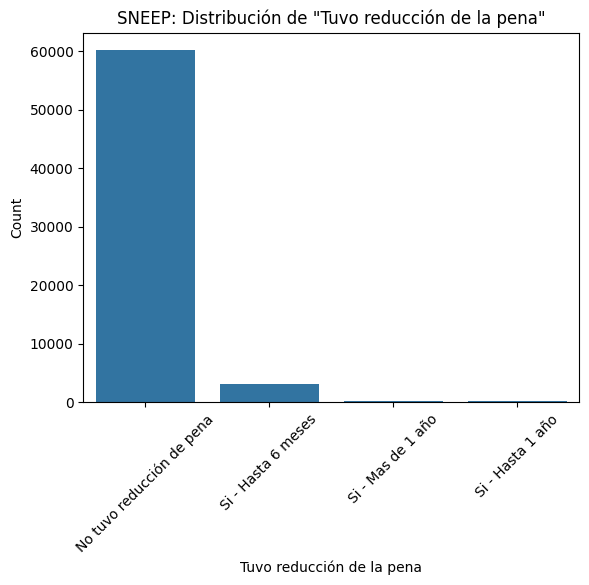

In [ ]:
# Graficamos la distribución de la columna tuvo_reduccion_pena_descripcion
sns.countplot(x='tuvo_reduccion_pena_descripcion', data=df_sneep_no_ids_csv)
plt.title("SNEEP: Distribución de \"Tuvo reducción de la pena\"")
plt.xticks(rotation=45) 
plt.xlabel("Tuvo reducción de la pena")
plt.ylabel("Count")
plt.show()

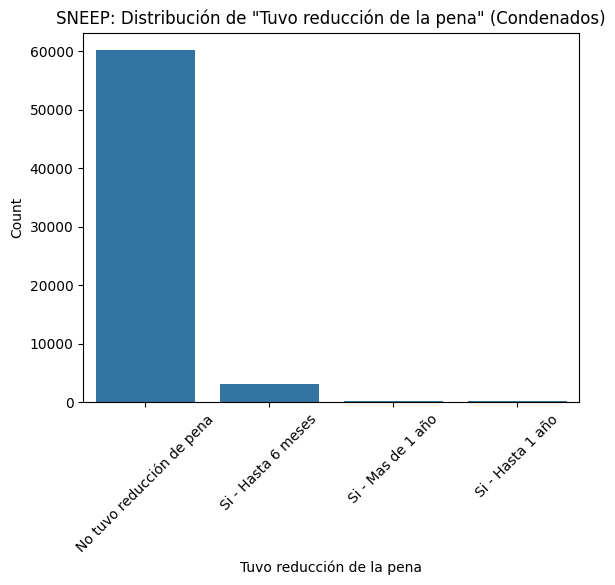

In [70]:
# Graficamos la distribución de la columna tuvo_reduccion_pena_descripcion
sns.countplot(x='tuvo_reduccion_pena_descripcion', data=df_sneep_no_ids_csv_condenados)
plt.title("SNEEP: Distribución de \"Tuvo reducción de la pena\" (Condenados)")
plt.xticks(rotation=45) 
plt.xlabel("Tuvo reducción de la pena")
plt.ylabel("Count")
plt.show()

In [106]:
moda = df_sneep_no_ids_csv['edad'].mode()[0]
media = df_sneep_no_ids_csv['edad'].mean()
mediana = df_sneep_no_ids_csv['edad'].median()
max_edad = df_sneep_no_ids_csv['edad'].max()
min_edad = df_sneep_no_ids_csv['edad'].min()

print(f"Datos respecto a la \"Edad\":\n\tModa:\t\t{moda}\n\tMedia:\t\t{media}\n\tMediana:\t{mediana}\n\tMáximo:\t\t{max_edad}\n\tMínimo:\t\t{min_edad}")

print(f"Cantidad de registros con edad igual a cero: {len(df_sneep_no_ids_csv[df_sneep_no_ids_csv['edad']==0])}")
print(f"Cantidad de registros con edad igual a máxima: {len(df_sneep_no_ids_csv[df_sneep_no_ids_csv['edad']==max_edad])}")

Datos respecto a la "Edad":
	Moda:		27
	Media:		35.490448078451685
	Mediana:	33.0
	Máximo:		93
	Mínimo:		0
Cantidad de registros con edad igual a cero: 1145
Cantidad de registros con edad igual a máxima: 1


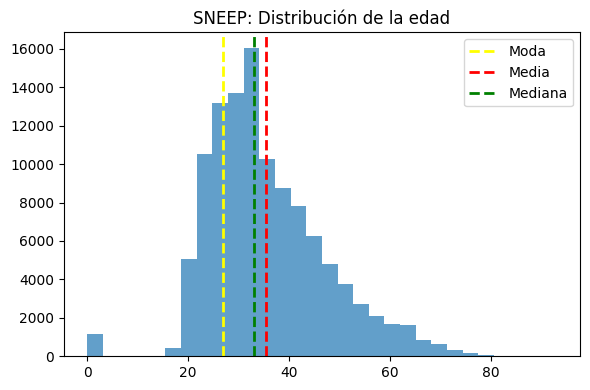

In [90]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(df_sneep_no_ids_csv['edad'], bins=30, alpha=0.7) # dibujar histograma
ax.axvline(df_sneep_no_ids_csv['edad'].mode()[0], color='yellow', ls='--', lw=2, label='Moda')
ax.axvline(df_sneep_no_ids_csv['edad'].mean(), color='red', ls='--', lw=2, label='Media')
ax.axvline(df_sneep_no_ids_csv['edad'].median(), color='green', ls='--', lw=2, label='Mediana')
ax.set_title('SNEEP: Distribución de la edad')
ax.legend()

plt.tight_layout()
plt.show()

In [107]:
moda_condenados = df_sneep_no_ids_csv_condenados['edad'].mode()[0]
media_condenados = df_sneep_no_ids_csv_condenados['edad'].mean()
mediana_condenados = df_sneep_no_ids_csv_condenados['edad'].median()
max_edad_condenados = df_sneep_no_ids_csv_condenados['edad'].max()
min_edad_condenados = df_sneep_no_ids_csv_condenados['edad'].min()

print(f"Datos respecto a la \"Edad\" (Condenados):\n\tModa:\t\t{moda_condenados}\n\tMedia:\t\t{media_condenados}\n\tMediana:\t{mediana_condenados}\n\tMáximo:\t\t{max_edad_condenados}\n\tMínimo:\t\t{min_edad_condenados}")

print(f"Cantidad de registros con edad igual a cero (Condenados): {len(df_sneep_no_ids_csv_condenados[df_sneep_no_ids_csv_condenados['edad']==0])}")
print(f"Cantidad de registros con edad igual a máxima: {len(df_sneep_no_ids_csv_condenados[df_sneep_no_ids_csv_condenados['edad']==max_edad_condenados])}")

Datos respecto a la "Edad" (Condenados):
	Moda:		29
	Media:		36.11910559448866
	Mediana:	34.0
	Máximo:		93
	Mínimo:		0
Cantidad de registros con edad igual a cero (Condenados): 449
Cantidad de registros con edad igual a máxima: 1


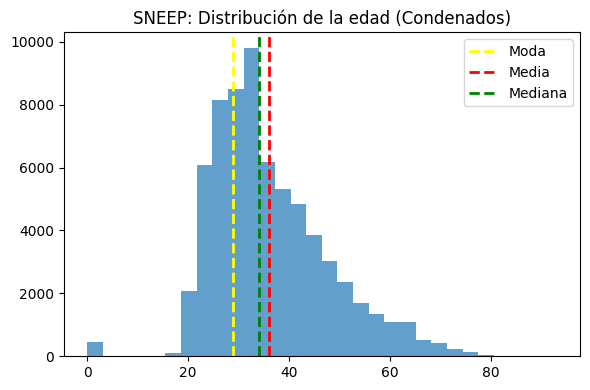

In [103]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(df_sneep_no_ids_csv_condenados['edad'], bins=30, alpha=0.7) # dibujar histograma
ax.axvline(df_sneep_no_ids_csv_condenados['edad'].mode()[0], color='yellow', ls='--', lw=2, label='Moda')
ax.axvline(df_sneep_no_ids_csv_condenados['edad'].mean(), color='red', ls='--', lw=2, label='Media')
ax.axvline(df_sneep_no_ids_csv_condenados['edad'].median(), color='green', ls='--', lw=2, label='Mediana')
ax.set_title('SNEEP: Distribución de la edad (Condenados)')
ax.legend()

plt.tight_layout()
plt.show()

In [62]:
df_sneep_no_ids_csv["jurisdiccion_descripcion"].value_counts(dropna=False)

jurisdiccion_descripcion
PROVINCIAL - Buenos Aires                52177
PROVINCIAL - Córdoba                     12363
PROVINCIAL - Santa Fe                     7836
FEDERAL                                   6927
PROVINCIAL - Mendoza                      5955
NACIONAL                                  5276
PROVINCIAL - Salta                        3921
PROVINCIAL - Entre Rios                   2414
PROVINCIAL - Misiones                     1695
PROVINCIAL - San Juan                     1641
PROVINCIAL - Tucumán                      1375
PROVINCIAL - Rio Negro                    1251
PROVINCIAL - Chaco                        1244
PROVINCIAL - Corrientes                   1102
PROVINCIAL - Jujuy                        1062
PROVINCIAL - Santiago del Estero           935
PROVINCIAL - Formosa                       648
PROVINCIAL - Chubut                        621
PROVINCIAL - La Pampa                      607
PROVINCIAL - San Luis                      605
PROVINCIAL - Neuquén               

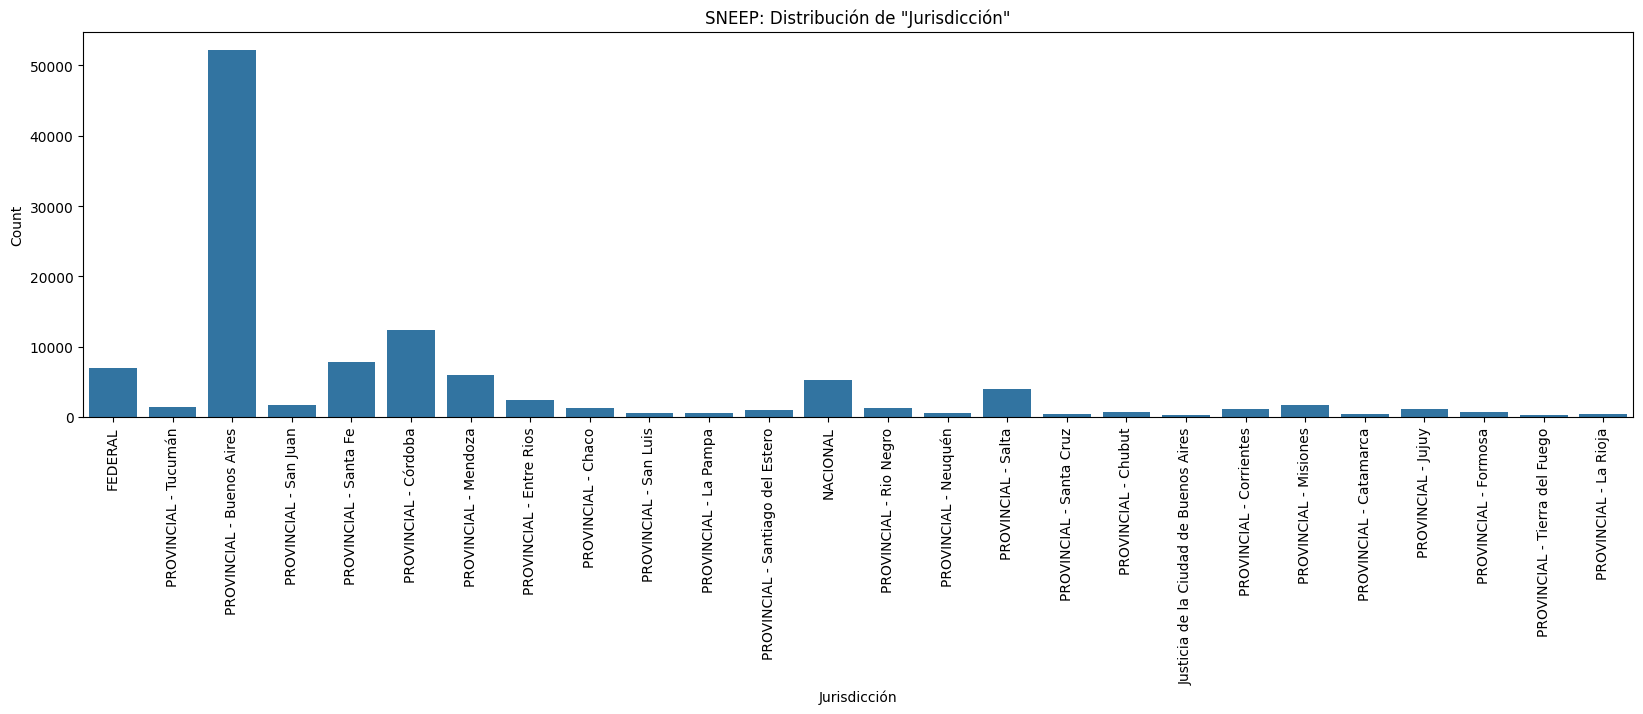

In [ ]:
# Graficamos la distribución de la columna jurisdiccion_descripcion
plt.figure(figsize=(20, 5))
sns.countplot(x='jurisdiccion_descripcion', data=df_sneep_no_ids_csv)
plt.title("SNEEP: Distribución de \"Jurisdicción\"")
plt.xticks(rotation=90) 
plt.xlabel("Jurisdicción")
plt.ylabel("Count")
plt.show()

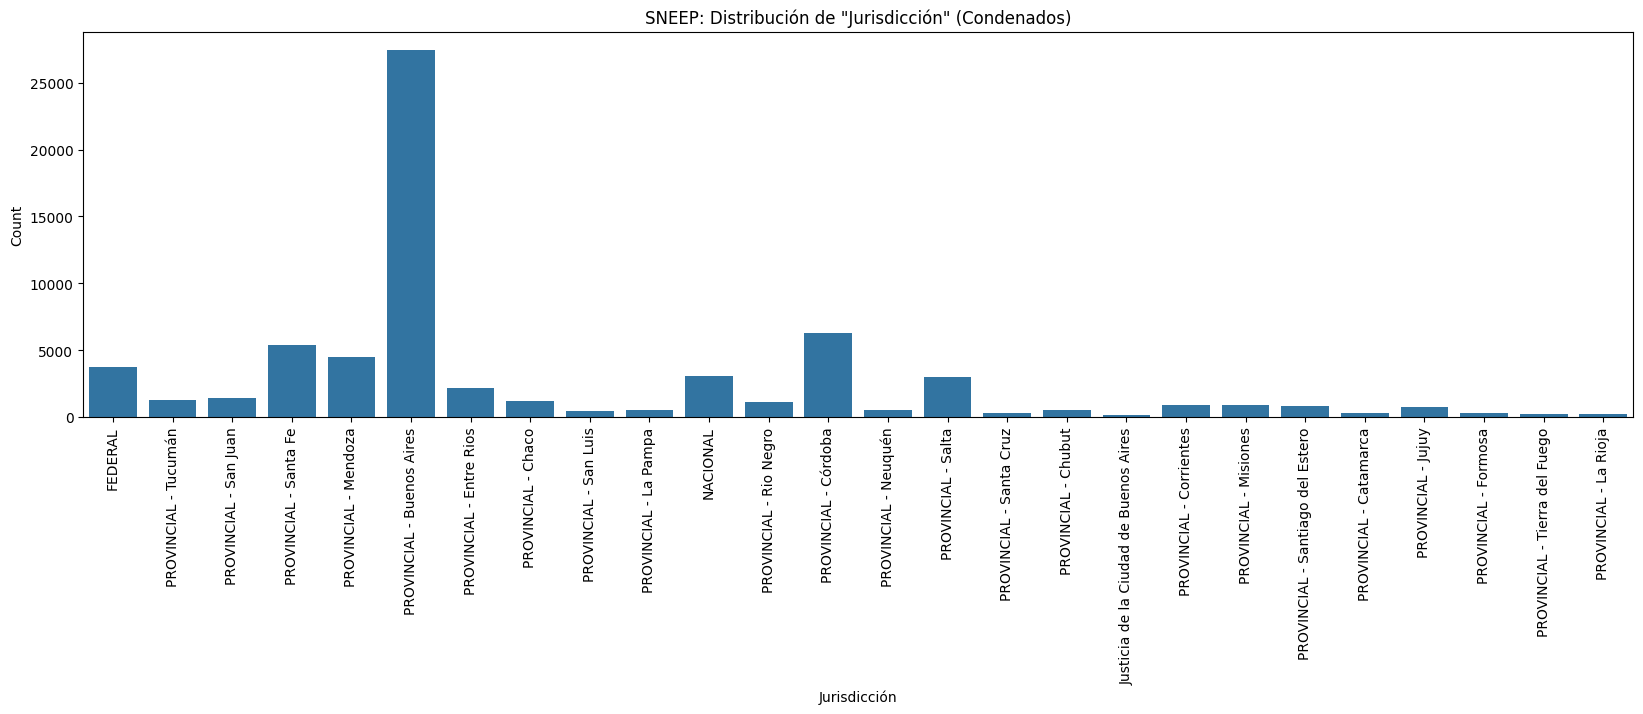

In [ ]:
# Graficamos la distribución de la columna jurisdiccion_descripcion
plt.figure(figsize=(20, 5))
sns.countplot(x='jurisdiccion_descripcion', data=df_sneep_no_ids_csv_condenados)
plt.title("SNEEP: Distribución de \"Jurisdicción\" (Condenados)")
plt.xticks(rotation=90) 
plt.xlabel("Jurisdicción")
plt.ylabel("Count")
plt.show()

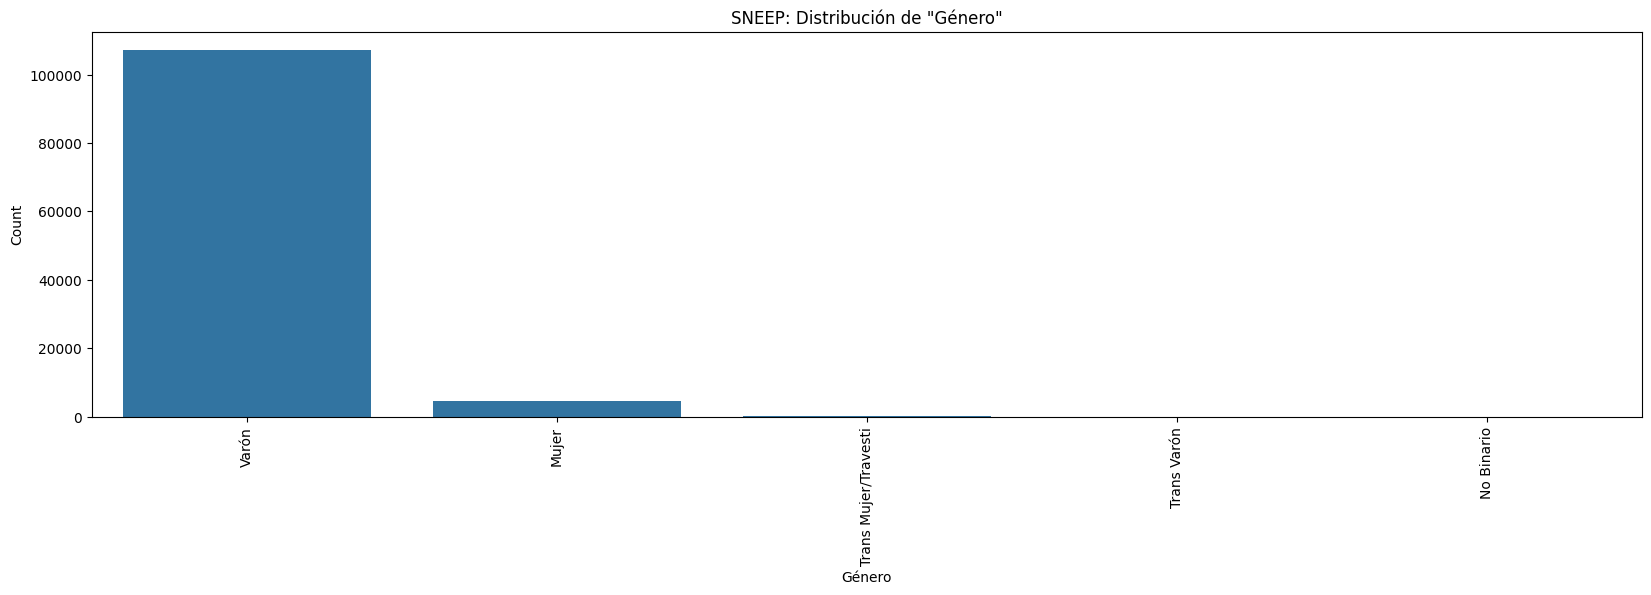

In [80]:
# Graficamos la distribución de la columna genero_descripcion
plt.figure(figsize=(20, 5))
sns.countplot(x='genero_descripcion', data=df_sneep_no_ids_csv)
plt.title("SNEEP: Distribución de \"Género\"")
plt.xticks(rotation=90) 
plt.xlabel("Género")
plt.ylabel("Count")
plt.show()

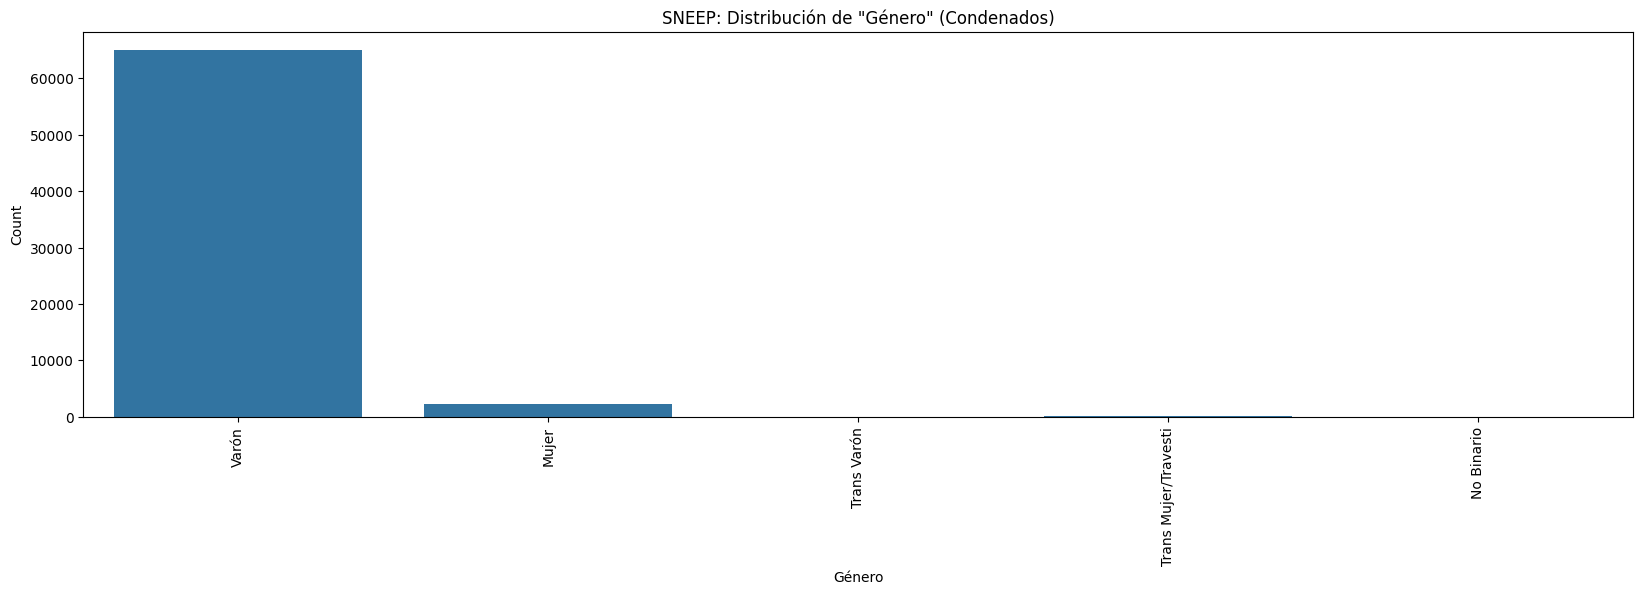

In [81]:
# Graficamos la distribución de la columna genero_descripcion
plt.figure(figsize=(20, 5))
sns.countplot(x='genero_descripcion', data=df_sneep_no_ids_csv_condenados)
plt.title("SNEEP: Distribución de \"Género\" (Condenados)")
plt.xticks(rotation=90) 
plt.xlabel("Género")
plt.ylabel("Count")
plt.show()

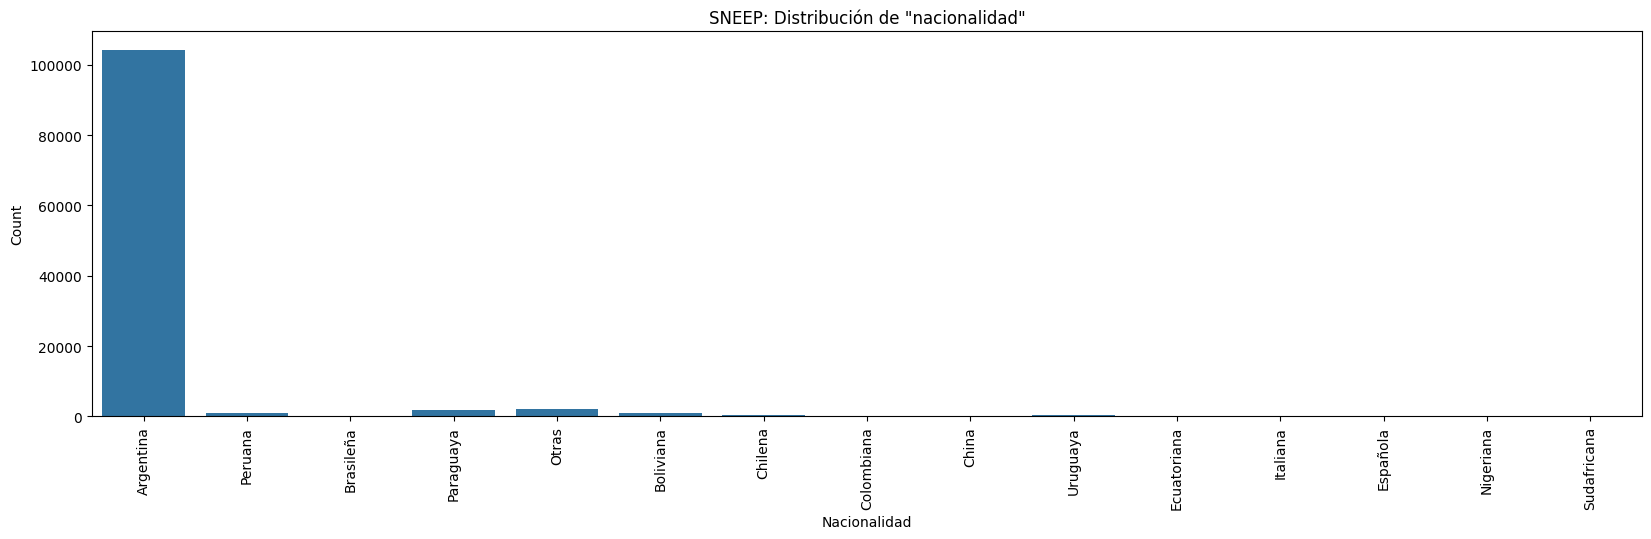

In [84]:
# Graficamos la distribución de la columna nacionalidad_descripcion
plt.figure(figsize=(20, 5))
sns.countplot(x='nacionalidad_descripcion', data=df_sneep_no_ids_csv)
plt.title("SNEEP: Distribución de \"nacionalidad\"")
plt.xticks(rotation=90) 
plt.xlabel("Nacionalidad")
plt.ylabel("Count")
plt.show()

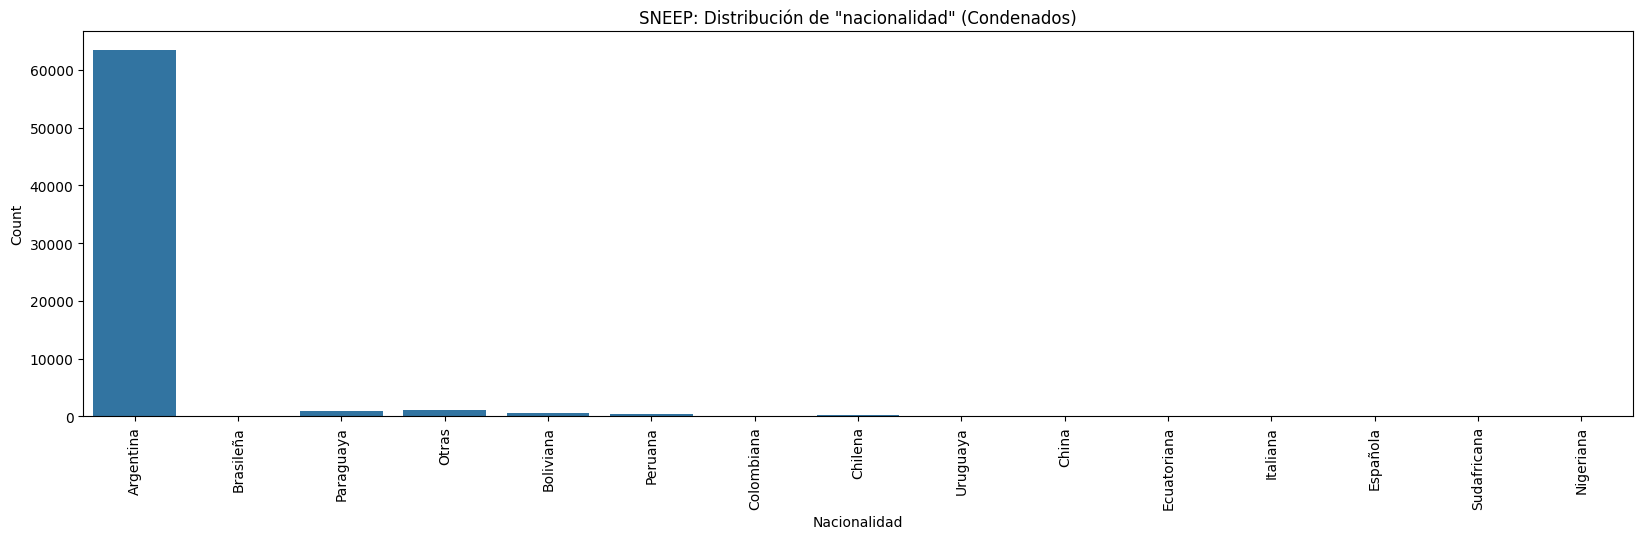

In [85]:
# Graficamos la distribución de la columna nacionalidad_descripcion
plt.figure(figsize=(20, 5))
sns.countplot(x='nacionalidad_descripcion', data=df_sneep_no_ids_csv_condenados)
plt.title("SNEEP: Distribución de \"nacionalidad\" (Condenados)")
plt.xticks(rotation=90) 
plt.xlabel("Nacionalidad")
plt.ylabel("Count")
plt.show()

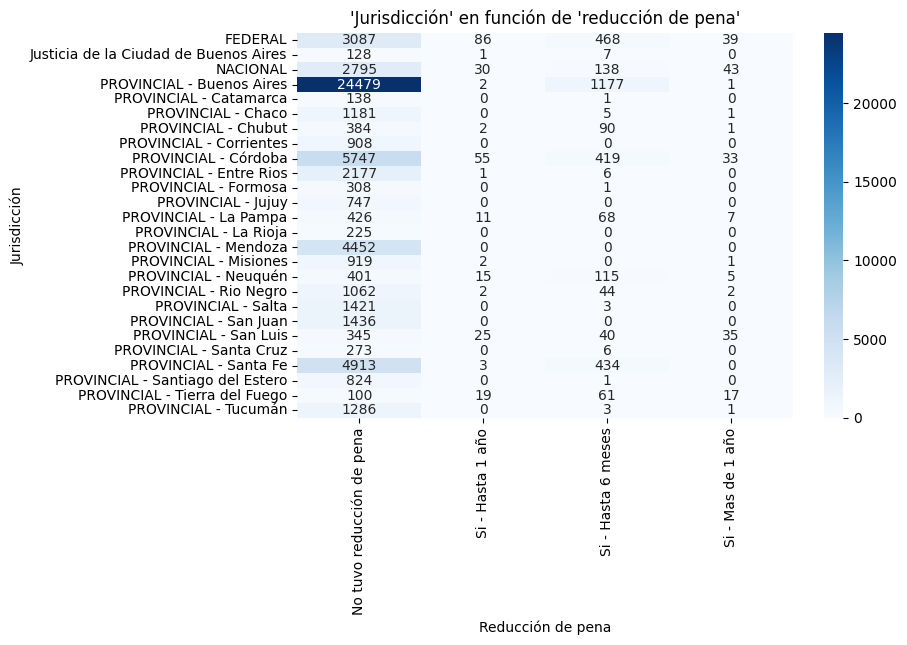

In [ ]:
# Graficamos la Jurisdicción en función de la reducción de pena
plt.figure(figsize=(8, 5))
cross_tab = pd.crosstab(df_sneep_no_ids_csv['jurisdiccion_descripcion'], df_sneep_no_ids_csv['tuvo_reduccion_pena_descripcion'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('\'Jurisdicción\' en función de la \'reducción de pena\'')
plt.xlabel('Reducción de pena')
plt.ylabel('Jurisdicción')
plt.show()

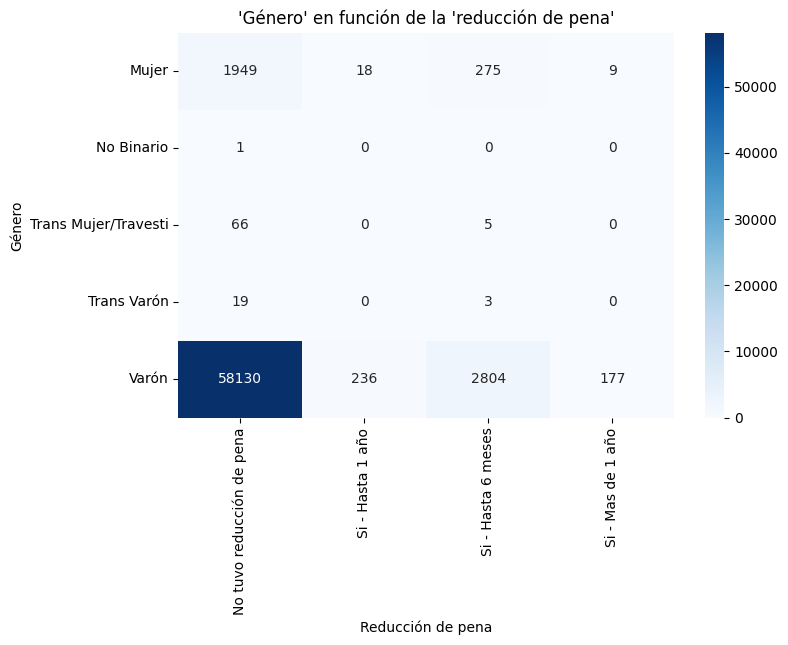

In [ ]:
# Graficamos el Género en función de la reducción de pena
plt.figure(figsize=(8, 5))
cross_tab = pd.crosstab(df_sneep_no_ids_csv['genero_descripcion'], df_sneep_no_ids_csv['tuvo_reduccion_pena_descripcion'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('\'Género\' en función de la \'reducción de pena\'')
plt.xlabel('Reducción de pena')
plt.ylabel('Género')
plt.show()

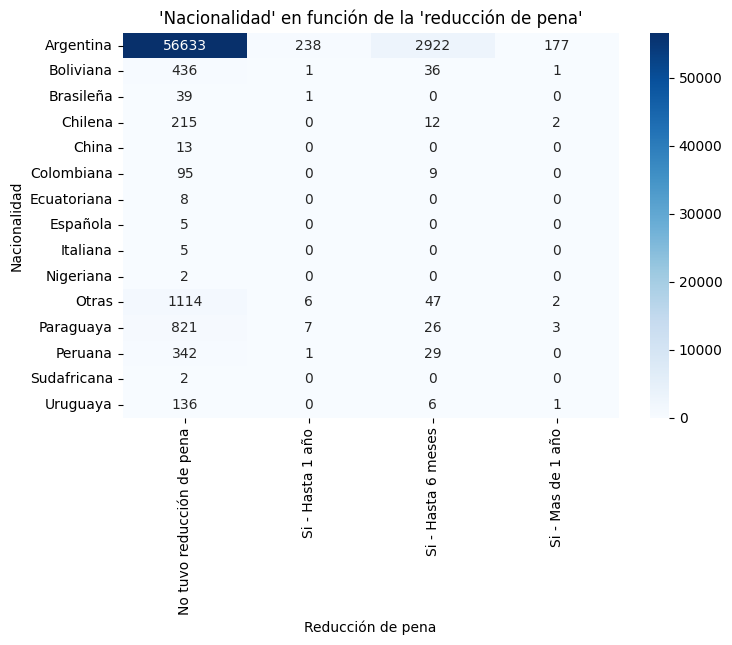

In [83]:
# Graficamos la nacionalidad en función de la reducción de pena
plt.figure(figsize=(8, 5))
cross_tab = pd.crosstab(df_sneep_no_ids_csv['nacionalidad_descripcion'], df_sneep_no_ids_csv['tuvo_reduccion_pena_descripcion'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('\'Nacionalidad\' en función de la \'reducción de pena\'')
plt.xlabel('Reducción de pena')
plt.ylabel('Nacionalidad')
plt.show()

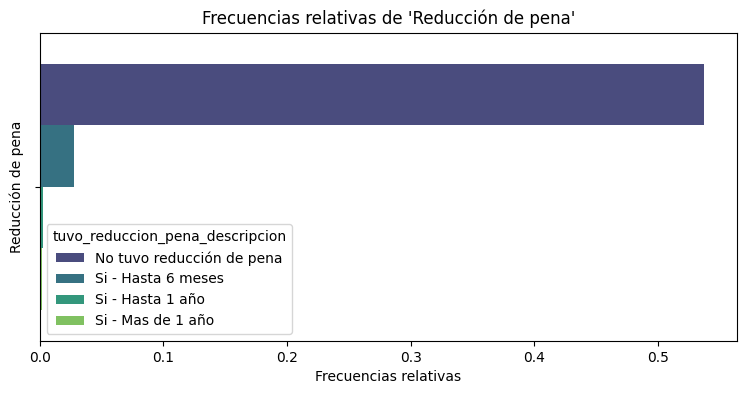

In [101]:
# Calcular frecuencias relativas
total = len(df_sneep_no_ids_csv)
relative_freq = df_sneep_no_ids_csv['tuvo_reduccion_pena_descripcion'].value_counts(dropna=False) / total

# Graficar frecuencias relativas
plt.figure(figsize=(9, 4))
sns.barplot(x=relative_freq.values, hue=relative_freq.index, palette='viridis')
plt.title('Frecuencias relativas de \'Reducción de pena\'')
plt.xlabel('Frecuencias relativas')
plt.ylabel('Reducción de pena')
plt.show()

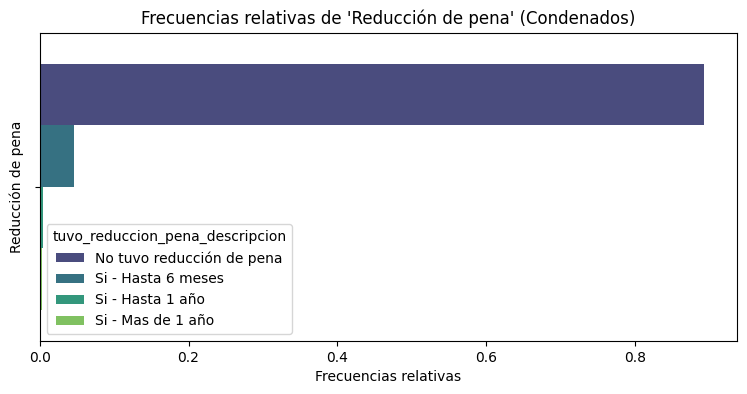

In [75]:
# Calcular frecuencias relativas
total = len(df_sneep_no_ids_csv_condenados)
relative_freq = df_sneep_no_ids_csv_condenados['tuvo_reduccion_pena_descripcion'].value_counts(dropna=False) / total

# Graficar frecuencias relativas
plt.figure(figsize=(9, 4))
sns.barplot(x=relative_freq.values, hue=relative_freq.index, palette='viridis')
plt.title('Frecuencias relativas de \'Reducción de pena\' (Condenados)')
plt.xlabel('Frecuencias relativas')
plt.ylabel('Reducción de pena')
plt.show()